In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
import pandas as pd
import seaborn as sns
import yfinance as yf
from yahoofinancials import YahooFinancials
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
% cd "/content/drive/MyDrive/Data Analysis/Project"

df = pd.read_csv('covid-data.csv')
vaccine = pd.read_csv('vaccinations.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data Analysis/Project


In [ ]:
caseUSA = df.groupby(by='date')['new_cases'].sum().reset_index(name ='new_cases')
caseUSA['date'] = pd.to_datetime(caseUSA['date'])
caseUSA = caseUSA[(caseUSA['date'] <= '2022-04-01')]
caseUSA = caseUSA.sort_values(by=['date'], ascending=True)
caseUSA[['new_cases']] = scaler.fit_transform(caseUSA[['new_cases']])
deathUSA = df.groupby(by='date')['new_deaths'].sum().reset_index(name ='new_deaths')
deathUSA['date'] = pd.to_datetime(deathUSA['date'])
deathUSA = deathUSA.sort_values(by=['date'], ascending=True)
vaccineUSA = vaccine.groupby(by='date')['daily_vaccinations'].sum().reset_index(name ='daily_vaccinations')
vaccineUSA['date'] = pd.to_datetime(vaccine['date'])
vaccineUSA = vaccineUSA.sort_values(by=['date'], ascending=True)
vaccineUSA[['daily_vaccinations']] = scaler.fit_transform(vaccineUSA[['daily_vaccinations']])

In [ ]:
Shopping_website = ['AMZN', 'EBAY', 'BABA', 'OSTK']
Tech = ['AAPL', 'AMZN', 'MSFT']
Education = ['ZM', 'MSFT']
Healthcare = ['JNJ', 'PFE', 'MRNA']
Entertainment = ['NFLX']
Socialmedia = ['TWTR', 'FB']
Travel = ['DAL']

In [ ]:
def plot(names, feature, type):
  
  ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Close'])
    ], remainder='passthrough')
  plt.rcParams["figure.figsize"] = (20,5)
  for i in names:
    df = yf.download(i, start='2020-01-21', end='2022-04-20', progress=False)
    df['date'] = df.index
    df['Close'] = ct.fit_transform(df)
    price_by_stock = df['Close']
    plt.plot(df['date'],price_by_stock, label=i)
  plt.xlabel('Date')
  plt.ylabel('Standardized prices')
  plt.title(type + "'s stock price")
  plt.legend()

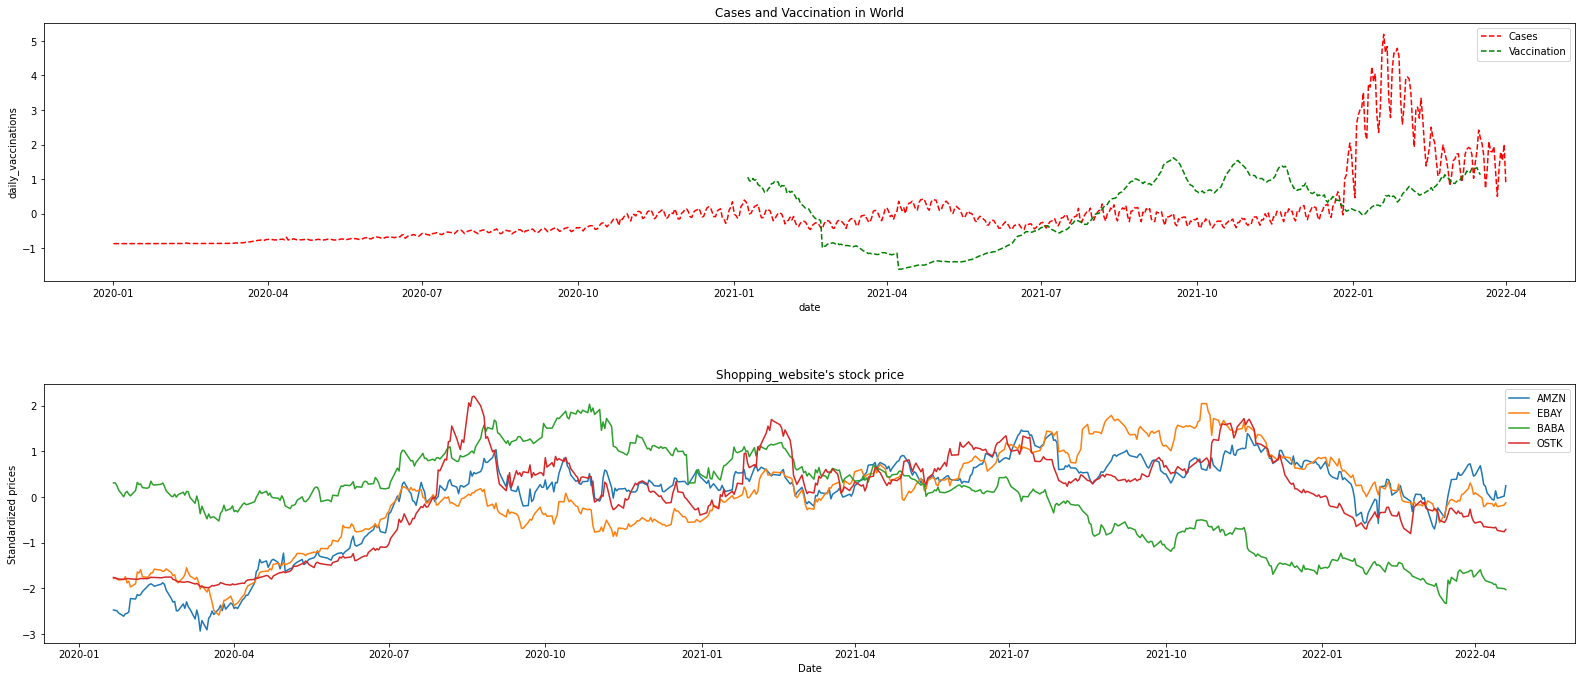

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(22,6))
fig.tight_layout()

ax = plt.subplot(2,1,1)
plt.plot(caseUSA['date'],caseUSA['new_cases'], '--', color='r', label='Cases')
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'], linestyle="dashed", color='g', label='Vaccination', ci=None)
plt.legend()
plt.title('Cases and Vaccination in World')

ax = plt.subplot(2,1,2)
plot(Shopping_website, 'Close', "Shopping_website")

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

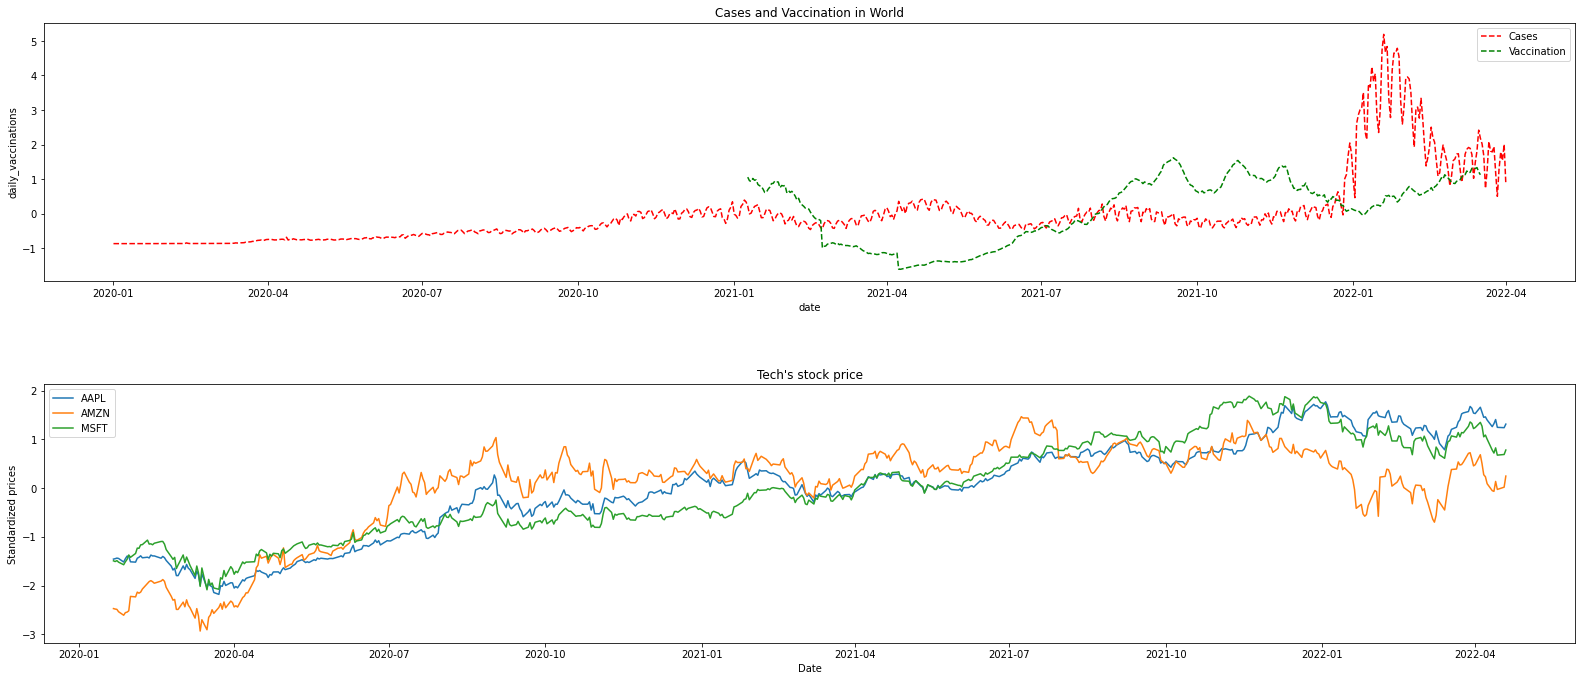

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(22,6))
fig.tight_layout()

ax = plt.subplot(2,1,1)
plt.plot(caseUSA['date'],caseUSA['new_cases'], '--', color='r', label='Cases')
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'], linestyle="dashed", color='g', label='Vaccination', ci=None)
plt.legend()
plt.title('Cases and Vaccination in World')

ax = plt.subplot(2,1,2)
plot(Tech, 'Close', 'Tech')

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

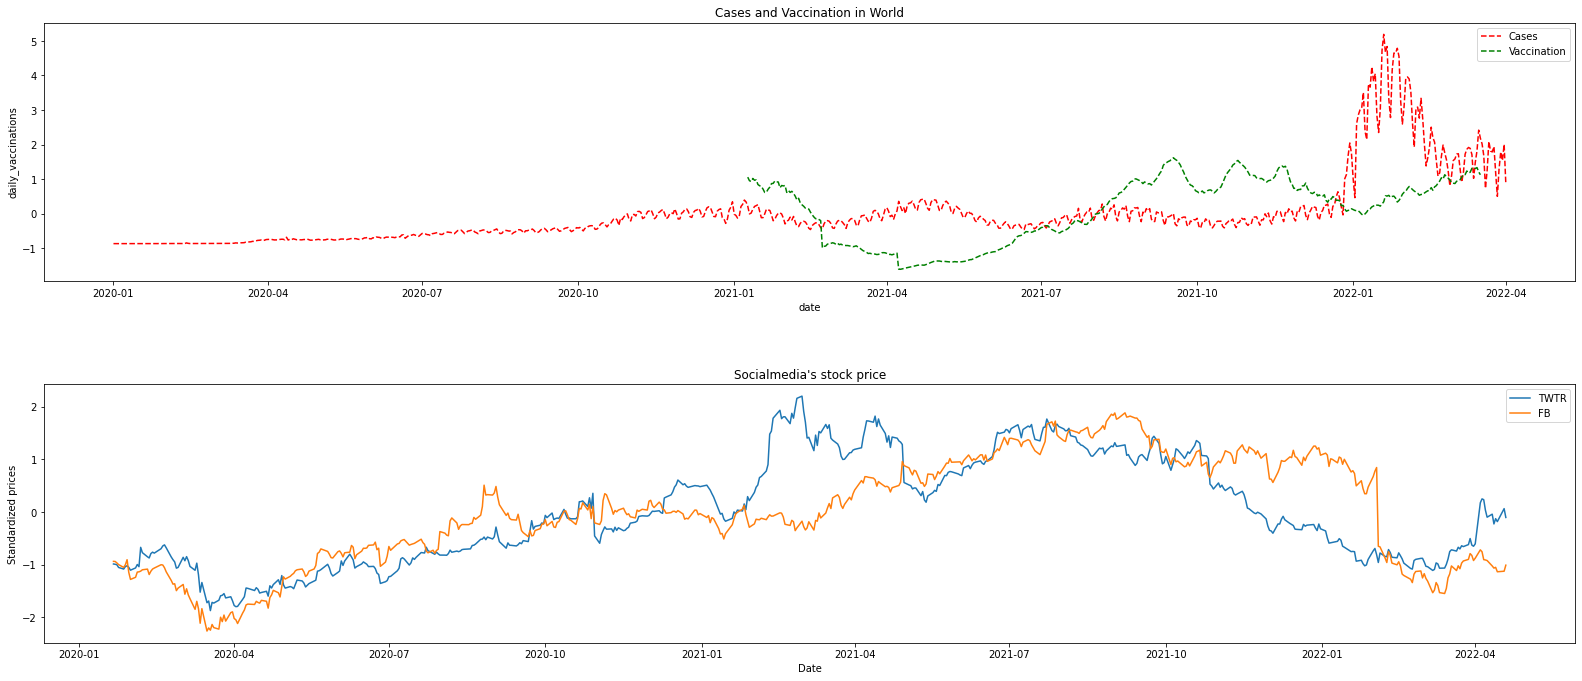

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(22,6))
fig.tight_layout()

ax = plt.subplot(2,1,1)
plt.plot(caseUSA['date'],caseUSA['new_cases'], '--', color='r', label='Cases')
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'], linestyle="dashed", color='g', label='Vaccination', ci=None)
plt.legend()
plt.title('Cases and Vaccination in World')

ax = plt.subplot(2,1,2)
plot(Socialmedia, 'Close', 'Socialmedia')

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

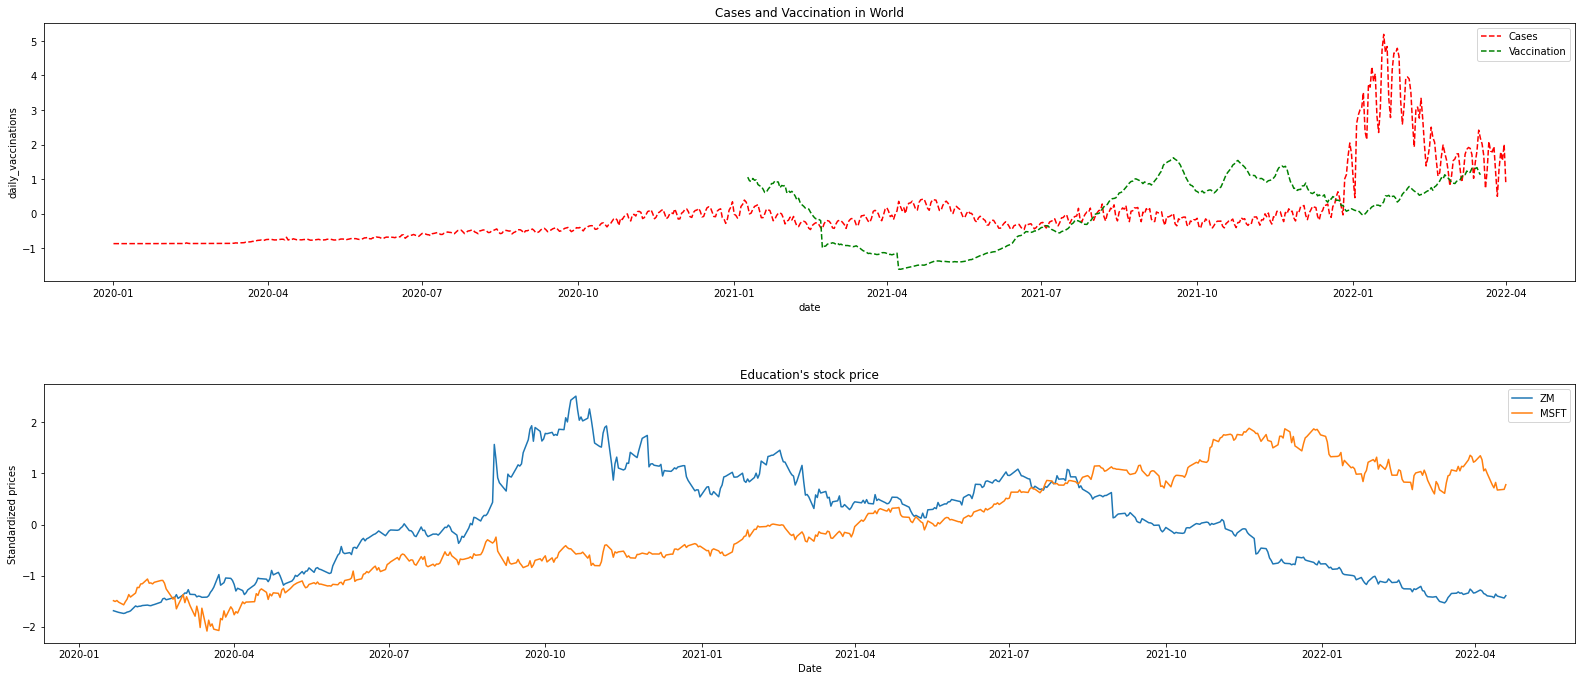

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(22,6))
fig.tight_layout()

ax = plt.subplot(2,1,1)
plt.plot(caseUSA['date'],caseUSA['new_cases'], '--', color='r', label='Cases')
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'], linestyle="dashed", color='g', label='Vaccination', ci=None)
plt.legend()
plt.title('Cases and Vaccination in World')

ax = plt.subplot(2,1,2)
plot(Education, 'Close', 'Education')

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

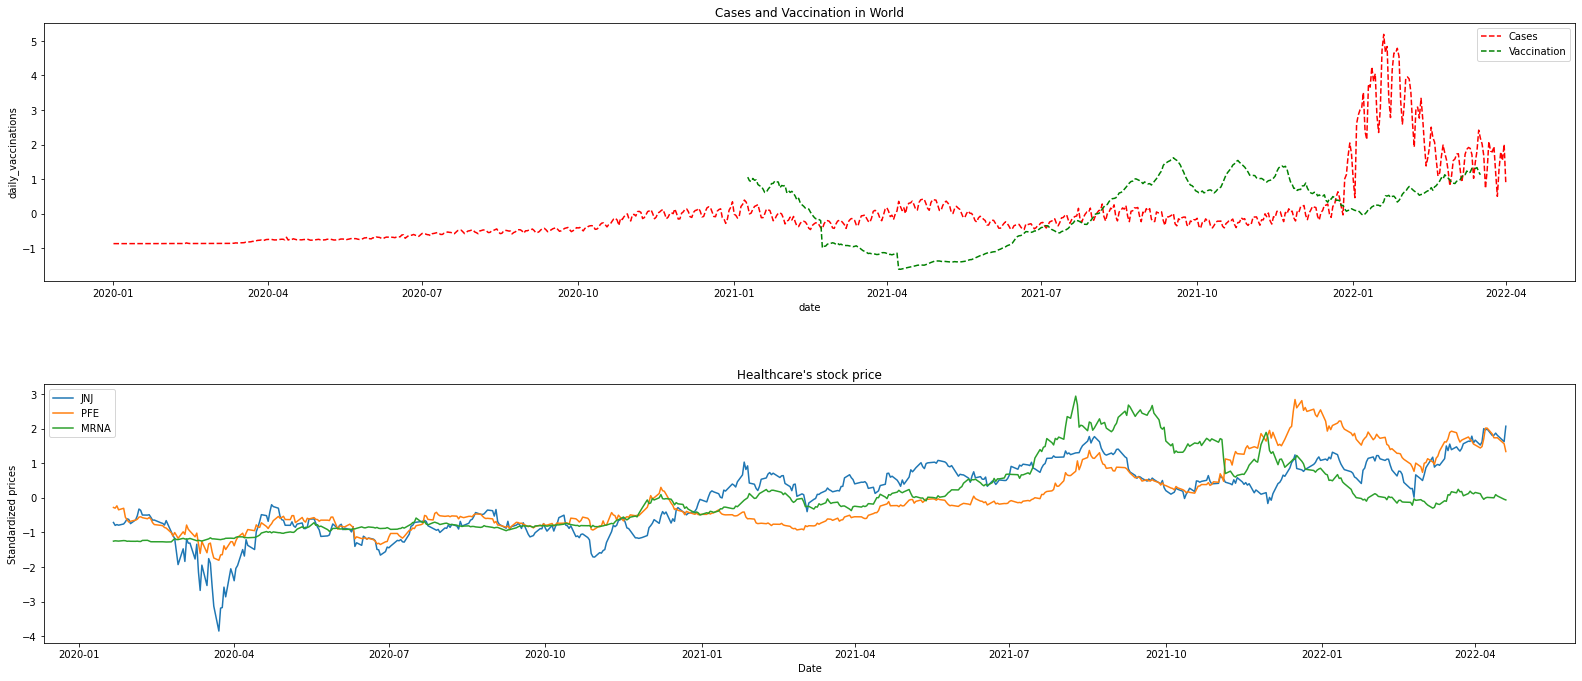

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(22,6))
fig.tight_layout()

ax = plt.subplot(2,1,1)
plt.plot(caseUSA['date'],caseUSA['new_cases'], '--', color='r', label='Cases')
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'], linestyle="dashed", color='g', label='Vaccination', ci=None)
plt.legend()
plt.title('Cases and Vaccination in World')

ax = plt.subplot(2,1,2)
plot(Healthcare, 'Close', 'Healthcare')

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

In [ ]:
def plot(names, feature, type):
  
  # ct = ColumnTransformer([
  #       ('somename', StandardScaler(), ['Close'])
  #   ], remainder='passthrough')
  plt.rcParams["figure.figsize"] = (20,5)
  for i in names:
    df = yf.download(i, start='2020-01-21', end='2022-04-20', progress=False)
    df['date'] = df.index
    # df['Close'] = ct.fit_transform(df)
    price_by_stock = df['Close']
    plt.plot(df['date'],price_by_stock, label=i)
  plt.xlabel('Date')
  plt.ylabel('Standardized prices')
  plt.title(type + "'s stock price")
  plt.legend()

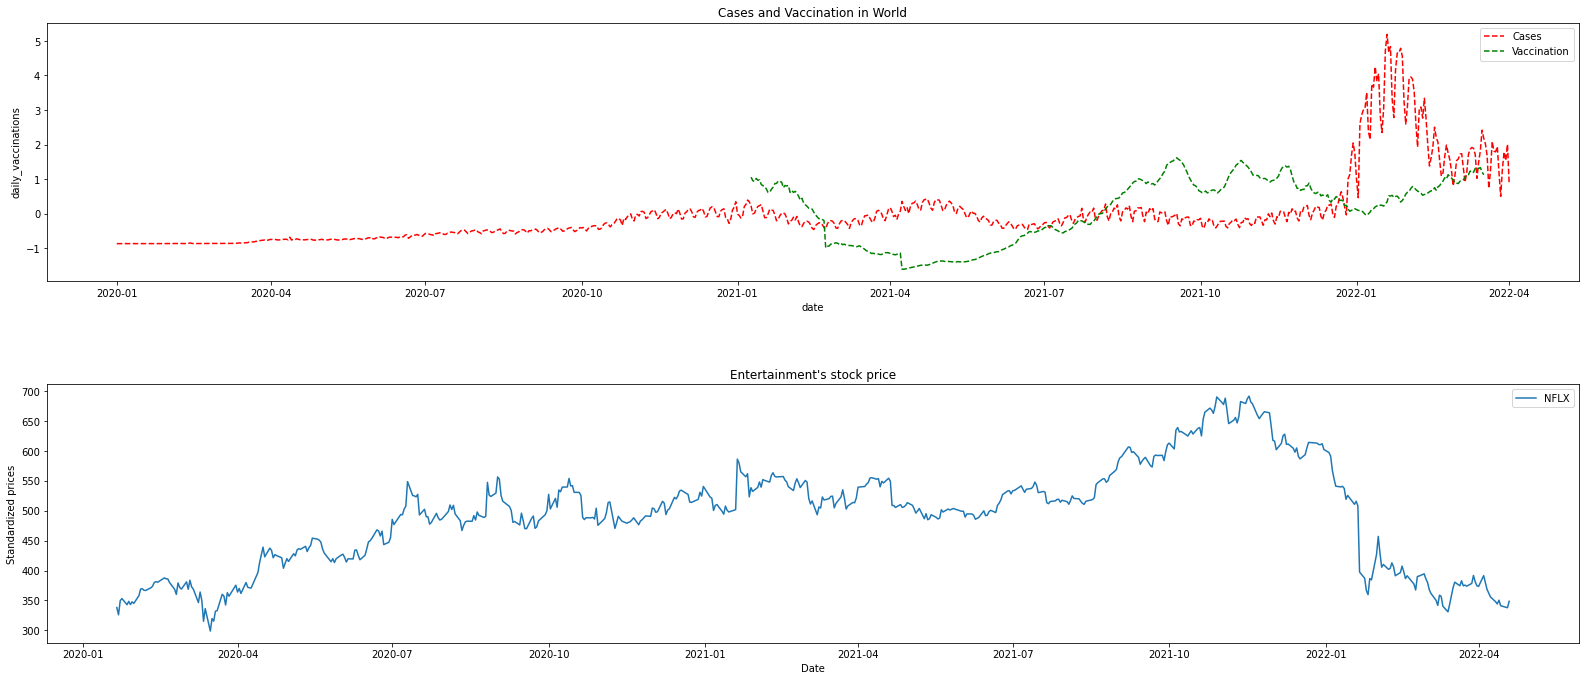

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(22,6))
fig.tight_layout()

ax = plt.subplot(2,1,1)
plt.plot(caseUSA['date'],caseUSA['new_cases'], '--', color='r', label='Cases')
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'], linestyle="dashed", color='g', label='Vaccination', ci=None)
plt.legend()
plt.title('Cases and Vaccination in World')

ax = plt.subplot(2,1,2)
plot(Entertainment, 'Close', 'Entertainment')

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

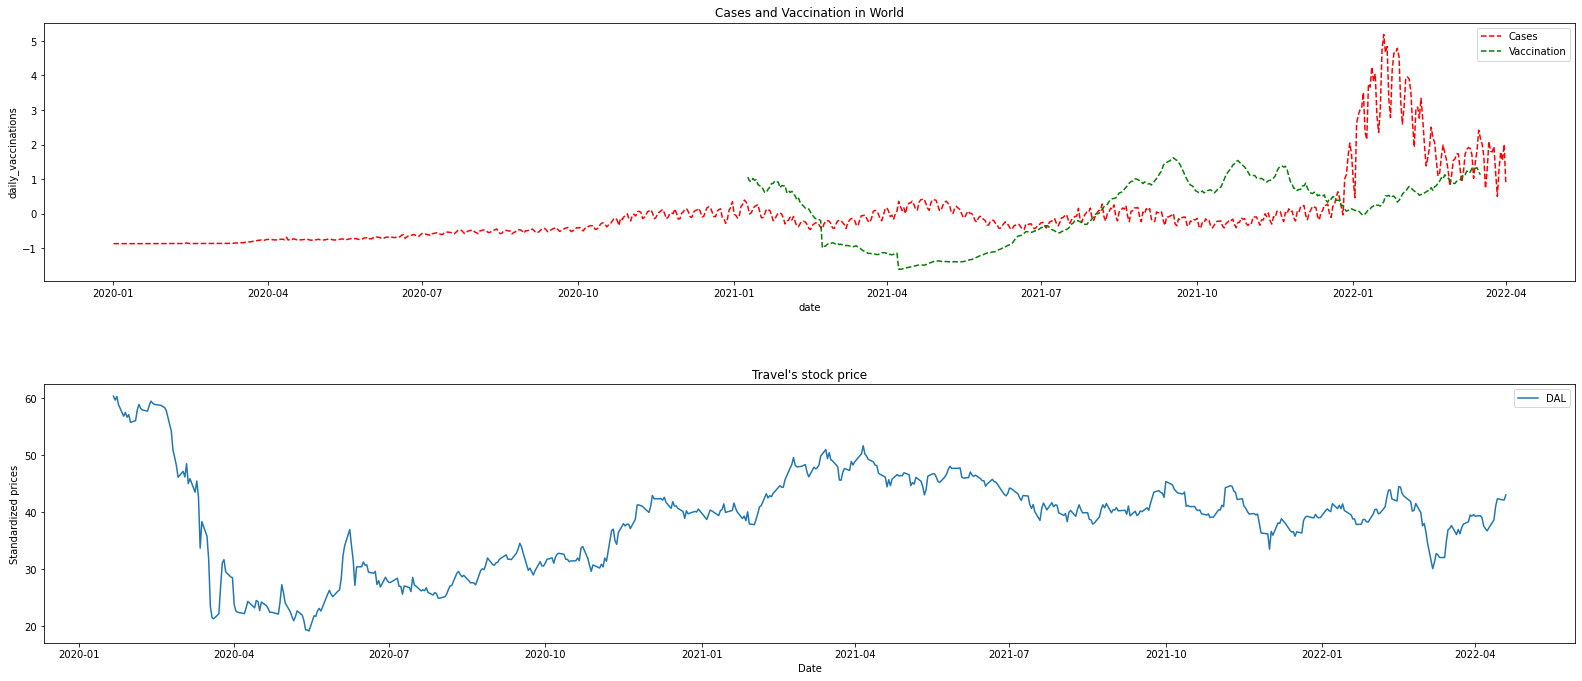

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(22,6))
fig.tight_layout()

ax = plt.subplot(2,1,1)
plt.plot(caseUSA['date'],caseUSA['new_cases'], '--', color='r', label='Cases')
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'], linestyle="dashed", color='g', label='Vaccination', ci=None)
plt.legend()
plt.title('Cases and Vaccination in World')

ax = plt.subplot(2,1,2)
plot(Travel, 'Close', 'Travel')

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

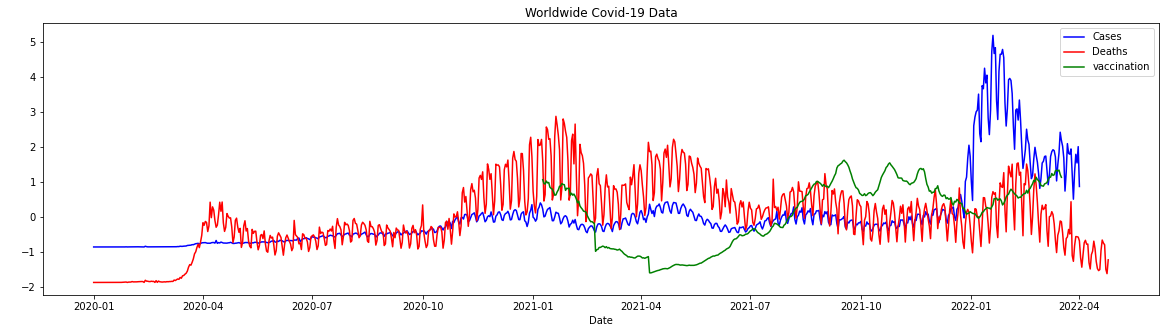

In [ ]:
caseUSA[['new_cases']] = scaler.fit_transform(caseUSA[['new_cases']])
deathUSA[['new_deaths']] = scaler.fit_transform(deathUSA[['new_deaths']])
vaccineUSA[['daily_vaccinations']] = scaler.fit_transform(vaccineUSA[['daily_vaccinations']])

figure(figsize=(20, 5))
sns.lineplot(caseUSA['date'],caseUSA['new_cases'],color='blue', label='Cases')
sns.lineplot(deathUSA['date'],deathUSA['new_deaths'],color='red', label='Deaths')
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'],color='green', label='vaccination', ci=None)
plt.title('Worldwide Covid-19 Data')
plt.xlabel('Date')
plt.ylabel(' ')
plt.legend()
plt.show()

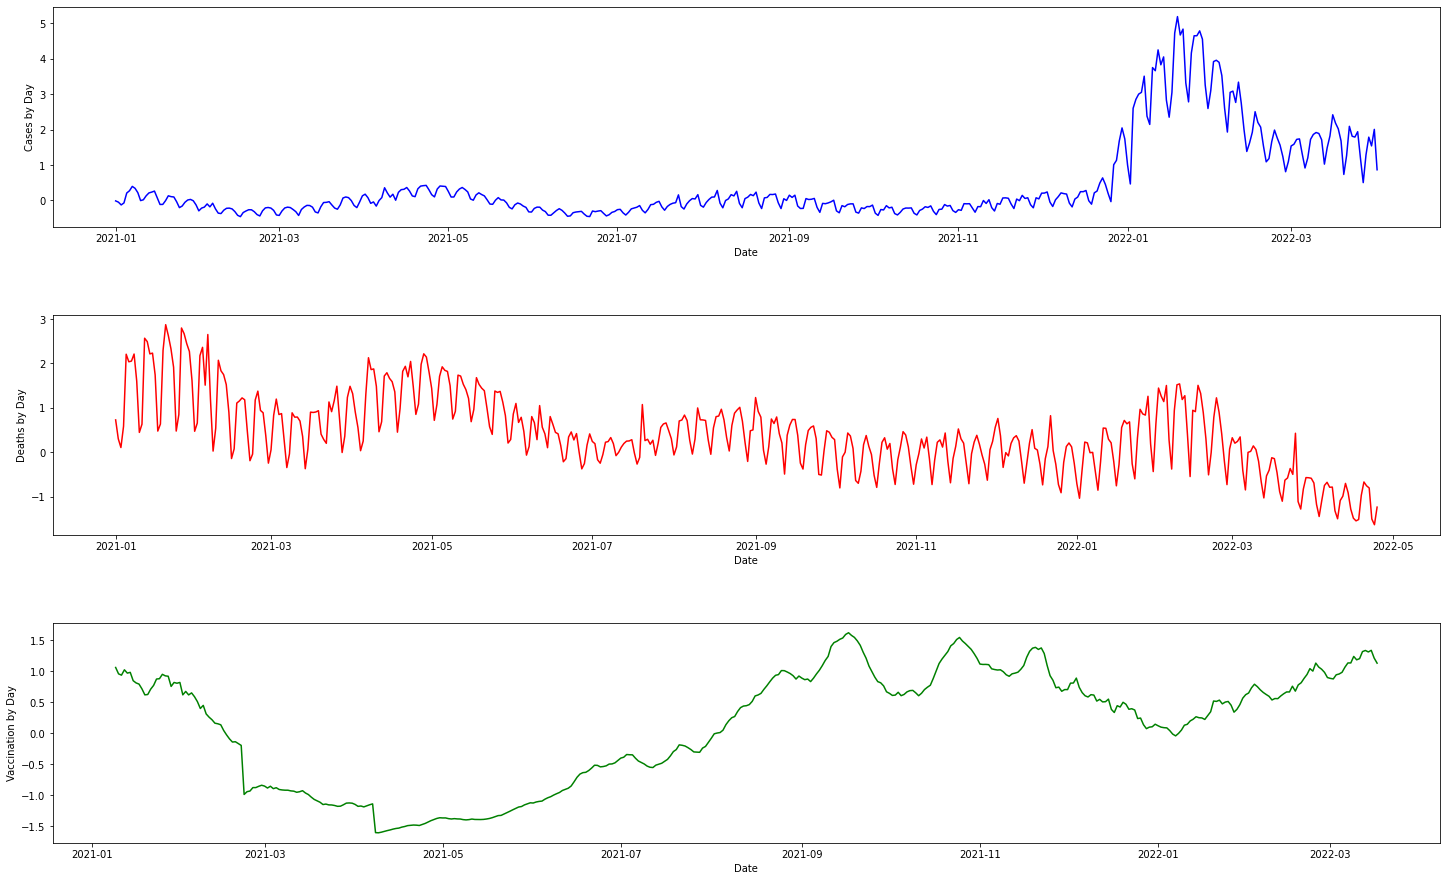

In [ ]:
caseUSA[['new_cases']] = scaler.fit_transform(caseUSA[['new_cases']])
caseUSA = caseUSA[caseUSA['date'] >= '2021-01-01']
deathUSA[['new_deaths']] = scaler.fit_transform(deathUSA[['new_deaths']])
deathUSA = deathUSA[deathUSA['date'] >= '2021-01-01']
vaccineUSA[['daily_vaccinations']] = scaler.fit_transform(vaccineUSA[['daily_vaccinations']])

fig, ax = plt.subplots(3, 1, figsize=(20,8))
fig.tight_layout()

ax = plt.subplot(3,1,1)
sns.lineplot(caseUSA['date'],caseUSA['new_cases'],color='blue')
plt.xlabel('Date')
plt.ylabel('Cases by Day')

ax = plt.subplot(3,1,2)
sns.lineplot(deathUSA['date'],deathUSA['new_deaths'],color='red')
plt.xlabel('Date')
plt.ylabel('Deaths by Day')

ax = plt.subplot(3,1,3)
sns.lineplot(vaccineUSA['date'],vaccineUSA['daily_vaccinations'],color='green', ci=None)
plt.xlabel('Date')
plt.ylabel('Vaccination by Day')

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

In [ ]:
caseUSA = df[['continent', 'new_cases']]
deathUSA = df[['continent', 'new_deaths']]

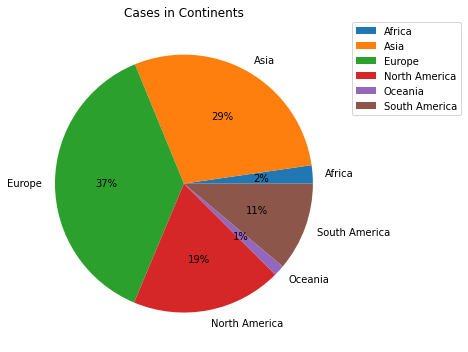

In [ ]:
caseUSA.groupby(['continent']).sum().plot(
    kind='pie', y='new_cases', 
  autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel(' ')
plt.title('Cases in Continents')
plt.tight_layout()
plt.show()

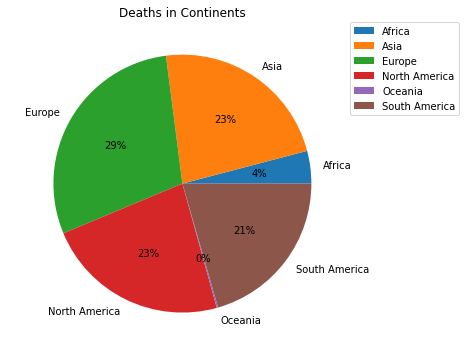

In [ ]:
deathUSA.groupby(['continent']).sum().plot(
    kind='pie', y='new_deaths', 
  autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel(' ')
plt.title('Deaths in Continents')
plt.tight_layout()
plt.show()